<a href="https://colab.research.google.com/github/rushi-k12/Image-Recognition/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/face-images1/Final Testing Images/face14/1face14.jpg
/kaggle/input/face-images1/Final Testing Images/face14/2face14.jpg
/kaggle/input/face-images1/Final Testing Images/face14/3face14.jpg
/kaggle/input/face-images1/Final Testing Images/face14/4face14.jpg
/kaggle/input/face-images1/Final Testing Images/face4/2face4.jpg
/kaggle/input/face-images1/Final Testing Images/face4/1face4.jpg
/kaggle/input/face-images1/Final Testing Images/face4/3face4.jpg
/kaggle/input/face-images1/Final Testing Images/face4/4face4.jpg
/kaggle/input/face-images1/Final Testing Images/face15/1face15.jpg
/kaggle/input/face-images1/Final Testing Images/face15/4face15.jpg
/kaggle/input/face-images1/Final Testing Images/face15/3face15.jpg
/kaggle/input/face-images1/Final Testing Images/face15/2face15.jpg
/kaggle/input/face-images1/Final Testing Images/face16/2face16.jpg
/kaggle/input/face-images1/Final Testing Images/face16/3face16.jpg
/kaggle/input/face-images1/Final Testing Images/face16/4face16.jpg
/ka

In [ ]:
TrainingImagePath='/kaggle/input/face-images1/Final Training Images'

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,

)

test_datagen = ImageDataGenerator()

training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

test_set.class_indices

Found 244 images belonging to 16 classes.
Found 244 images belonging to 16 classes.


{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15}

In [ ]:

TrainClasses=training_set.class_indices

ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

print("Mapping of Face and its ID",ResultMap)

OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'}

 The Number of output neurons:  16


In [ ]:

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input

classifier= Sequential()

classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

classifier.add(Flatten())

classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])

import time
StartTime=time.time()

classifier.fit(
                    training_set,
                    steps_per_epoch=30,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=10)

EndTime=time.time()
print("Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.0306 - loss: 151.7120 - val_accuracy: 0.0533 - val_loss: 4.3295
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.0886 - loss: 3.2449 - val_accuracy: 0.1393 - val_loss: 2.7311
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.1367 - loss: 2.7263 - val_accuracy: 0.1762 - val_loss: 2.7026
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.1538 - loss: 2.6603 - val_accuracy: 0.1721 - val_loss: 2.5108
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.1597 - loss: 2.4758 - val_accuracy: 0.2254 - val_loss: 2.3371
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.2665 - loss: 2.2721 - val_accuracy: 0.3566 - val_loss: 2.0301
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.3624 - loss: 1.9523 - val_accuracy: 0.5246 - val_loss: 1.5576
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.5188 - loss: 1.6370 - val_accuracy: 0.6762 - val_loss: 

In [ ]:
import numpy as np
from keras.preprocessing import image

ImagePath='/kaggle/input/face-images1/Final Training Images/face13/image_0288_Face_1.jpg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)

print('Prediction is: ',ResultMap[np.argmax(result)])

Prediction is:  face13


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


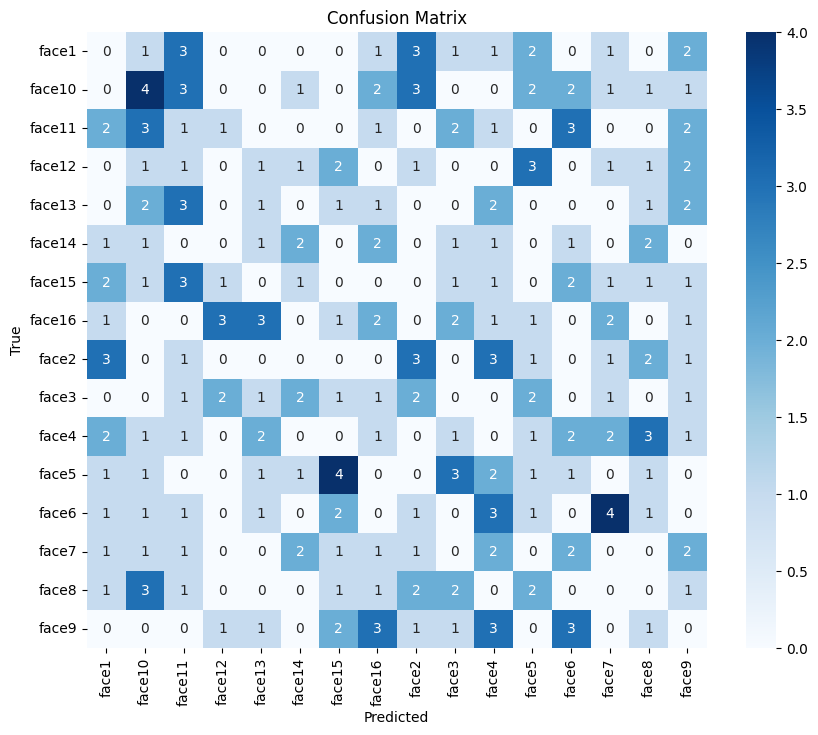

              precision    recall  f1-score   support

       face1       0.00      0.00      0.00        15
      face10       0.20      0.20      0.20        20
      face11       0.05      0.06      0.06        16
      face12       0.00      0.00      0.00        14
      face13       0.08      0.08      0.08        13
      face14       0.20      0.17      0.18        12
      face15       0.00      0.00      0.00        15
      face16       0.12      0.12      0.12        17
       face2       0.18      0.20      0.19        15
       face3       0.00      0.00      0.00        14
       face4       0.00      0.00      0.00        17
       face5       0.06      0.06      0.06        16
       face6       0.00      0.00      0.00        16
       face7       0.00      0.00      0.00        14
       face8       0.00      0.00      0.00        14
       face9       0.00      0.00      0.00        16

    accuracy                           0.06       244
   macro avg       0.06   

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

Y_pred = classifier.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)
true_labels = test_set.classes

cm = confusion_matrix(true_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(ResultMap.values()), yticklabels=list(ResultMap.values()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(true_labels, y_pred, target_names=list(ResultMap.values())))

In [ ]:

from keras.applications.vgg16 import VGG16
weights_path = '/kaggle/input/vgc-16/archive/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

base_model = VGG16(weights=weights_path, include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    TrainingImagePath,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_image = image.load_img(ImagePath, target_size=(img_height, img_width))
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)
test_image_array = test_image_array / 255.0

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10
)




Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 244 images belonging to 16 classes.
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 56s 7s/step - accuracy: 0.0659 - loss: -362.0899
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.0312 - loss: -1656.4382
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 55s 7s/step - accuracy: 0.0751 - loss: -2349.3098
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.0312 - loss: -4645.3491
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 74s 7s/step - accuracy: 0.0930 - loss: -5000.7627
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.1250 - loss: -5960.1406
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 57s 8s/step - accuracy: 0.0787 - loss: -8448.5273
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.1500 - loss: -8411.0762
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 54s 7s/step - accuracy: 0.0974 - loss: -11568.4648
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.0312 - loss: -14245.3516


In [ ]:
test_prediction = model.predict(test_image_array)
test_class_index = np.argmax(test_prediction)

test_set = datagen.flow_from_directory(
    TrainingImagePath,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)
test_loss, test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
Found 244 images belonging to 16 classes.
8/8 - 60s - 8s/step - accuracy: 0.0820 - loss: -1.5532e+04

Test accuracy: 0.08196721225976944
